<h1>Power Cleaning<h1>

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
power=pd.read_excel(r"D:\My Projects\grad project.DEPI\HOUSE_POWER_PROJECT\HOUSE_POWER_PROJECT\POWER.xlsx")
power

,Index,Global_active_power,Global_reactive_power,Apparent power
0,1,4.216,0.418,4.236671
1,2,5.360,0.436,5.377704
2,3,5.374,0.498,5.397025
3,4,5.388,0.502,5.411335
4,5,3.666,0.528,3.703828
...,...,...,...,...
13351,13352,0.404,0.000,0.404000
13352,13353,0.402,0.000,0.402000
13353,13354,0.402,0.000,0.402000
13354,13355,0.402,0.000,0.402000


In [38]:
print(power.describe())

              Index  Global_active_power  Global_reactive_power  \
count  13356.000000         13356.000000           13356.000000   
mean    6678.500000             0.183818               0.110681   
std     3855.689433             0.170413               0.110244   
min        1.000000             0.000000               0.000000   
25%     3339.750000             0.022568               0.000000   
50%     6678.500000             0.158755               0.092000   
75%    10017.250000             0.285603               0.168000   
max    13356.000000             1.000000               0.760000   

       Apparent power  
count    13356.000000  
mean         0.184832  
std          0.169563  
min          0.000000  
25%          0.025777  
50%          0.158951  
75%          0.285276  
max          1.000000  


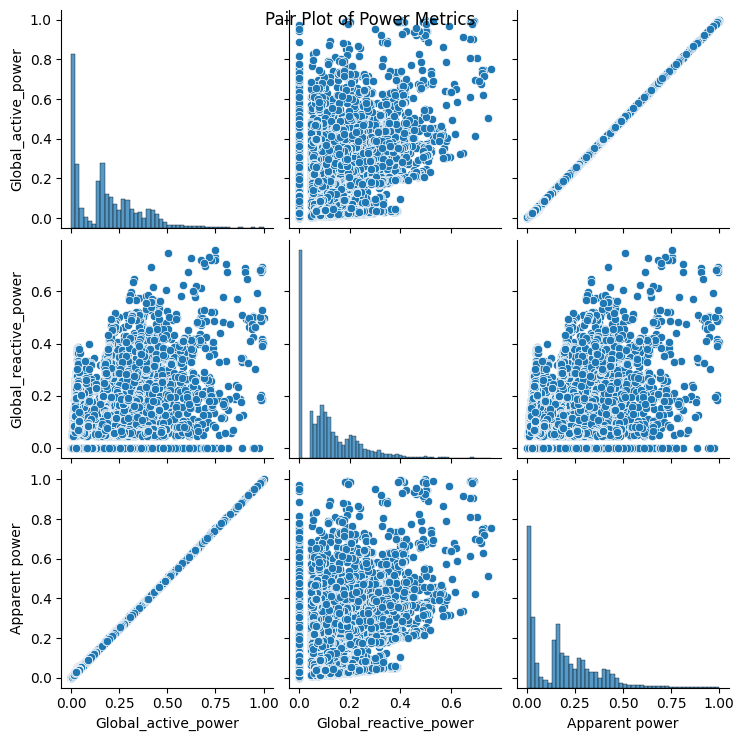

In [50]:
# Relationships Between Features
sns.pairplot(power[['Global_active_power', 'Global_reactive_power', 'Apparent power']])
plt.suptitle('Pair Plot of Power Metrics')
plt.show()

<h1> Sub Metering Cleaning<h1>

In [43]:
sub=pd.read_excel(r"D:\My Projects\grad project.DEPI\HOUSE_POWER_PROJECT\HOUSE_POWER_PROJECT\sub_meterings.xlsx")
sub

,Index,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1,4.216,0,1,17
1,2,5.360,0,1,16
2,3,5.374,0,2,17
3,4,5.388,0,1,17
4,5,3.666,0,1,17
...,...,...,...,...,...
13351,13352,0.404,0,0,0
13352,13353,0.402,0,0,0
13353,13354,0.402,0,0,0
13354,13355,0.402,0,0,0


In [47]:
sub.fillna(sub.mean(), inplace=True)

scaler = MinMaxScaler()

sub[['Global_active_power', 'Sub_metering_2', 'Sub_metering_3']] = scaler.fit_transform(
    sub[['Global_active_power', 'Sub_metering_2', 'Sub_metering_3']]
)
print(sub)

       Index  Global_active_power  Sub_metering_1  Sub_metering_2  \
0          1             0.521660             0.0        0.013699   
1          2             0.670039             0.0        0.013699   
2          3             0.671855             0.0        0.027397   
3          4             0.673671             0.0        0.013699   
4          5             0.450324             0.0        0.013699   
...      ...                  ...             ...             ...   
13351  13352             0.027237             0.0        0.000000   
13352  13353             0.026978             0.0        0.000000   
13353  13354             0.026978             0.0        0.000000   
13354  13355             0.026978             0.0        0.000000   
13355  13356             0.027237             0.0        0.000000   

       Sub_metering_3  
0                0.85  
1                0.80  
2                0.85  
3                0.85  
4                0.85  
...               ...  
133

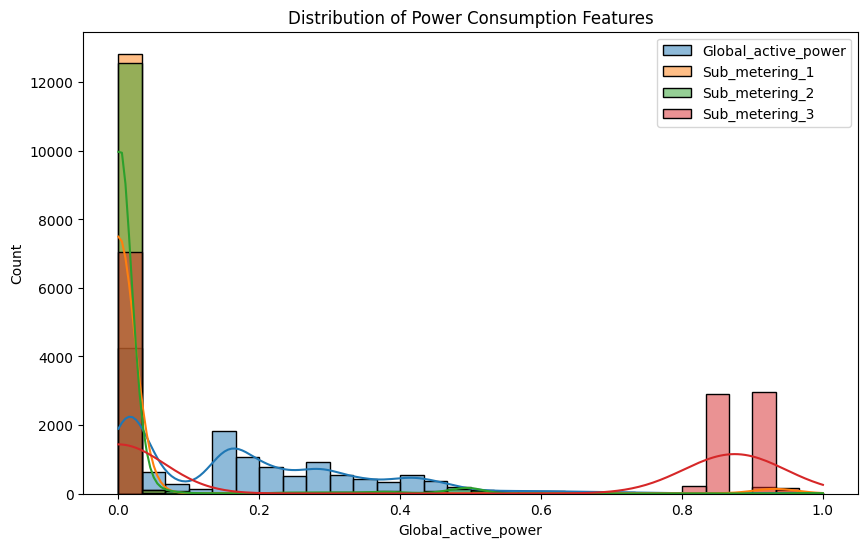

In [49]:
# Distribution Plot
plt.figure(figsize=(10, 6))
for column in ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    sns.histplot(sub[column], kde=True, label=column, bins=30)
plt.title('Distribution of Power Consumption Features')
plt.legend()
plt.show()

<h1> Voltage Current Cleaning<h1>

In [51]:
voltage=pd.read_excel(r"D:\My Projects\grad project.DEPI\HOUSE_POWER_PROJECT\HOUSE_POWER_PROJECT\VOLTAGE_CURRENT.xlsx")
voltage

,Index,Date,Time,Voltage,Global_intensity
0,1,16/12/2006,17:24:00,234.84,18.4
1,2,16/12/2006,17:25:00,233.63,23.0
2,3,16/12/2006,17:26:00,233.29,23.0
3,4,16/12/2006,17:27:00,233.74,23.0
4,5,16/12/2006,17:28:00,235.68,15.8
...,...,...,...,...,...
13351,13352,2008-09-01 00:00:00,23:55:00,244.58,1.8
13352,13353,2008-09-01 00:00:00,23:56:00,243.69,1.8
13353,13354,2008-09-01 00:00:00,23:57:00,244.06,1.8
13354,13355,2008-09-01 00:00:00,23:58:00,244.27,1.8


In [53]:
voltage['Voltage'].fillna(voltage['Voltage'].mean(), inplace=True)
voltage['Global_intensity'].fillna(voltage['Global_intensity'].mean(), inplace=True)

scaler = MinMaxScaler()

voltage[['Voltage', 'Global_intensity']] = scaler.fit_transform(voltage[['Voltage', 'Global_intensity']])

print(voltage)

       Index                 Date      Time   Voltage  Global_intensity
0          1           16/12/2006  17:24:00  0.335620          0.520710
1          2           16/12/2006  17:25:00  0.280293          0.656805
2          3           16/12/2006  17:26:00  0.264746          0.656805
3          4           16/12/2006  17:27:00  0.285322          0.656805
4          5           16/12/2006  17:28:00  0.374028          0.443787
...      ...                  ...       ...       ...               ...
13351  13352  2008-09-01 00:00:00  23:55:00  0.780979          0.029586
13352  13353  2008-09-01 00:00:00  23:56:00  0.740283          0.029586
13353  13354  2008-09-01 00:00:00  23:57:00  0.757202          0.029586
13354  13355  2008-09-01 00:00:00  23:58:00  0.766804          0.029586
13355  13356  2008-09-01 00:00:00  23:59:00  0.791495          0.029586

[13356 rows x 5 columns]


C:\Users\asmaa\AppData\Local\Temp\ipykernel_1456\3961491171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  voltage['Voltage'].fillna(voltage['Voltage'].mean(), inplace=True)
C:\Users\asmaa\AppData\Local\Temp\ipykernel_1456\3961491171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

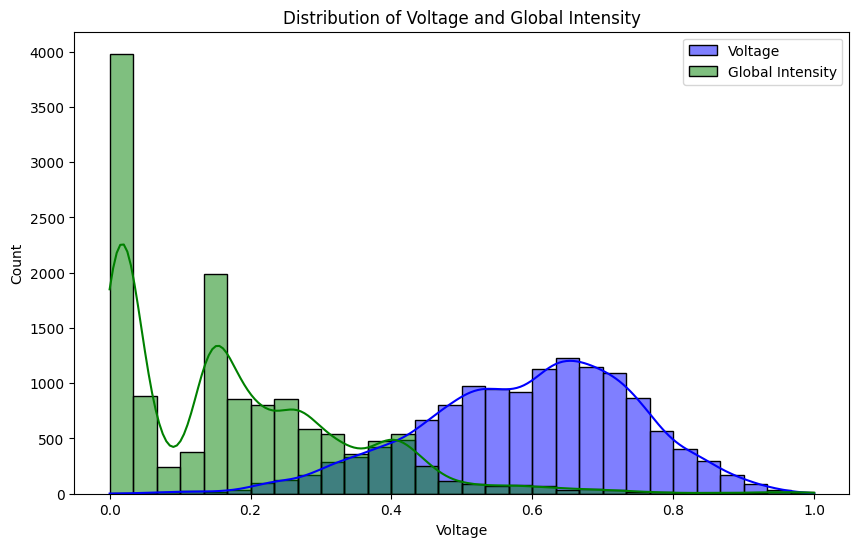

In [59]:
#Distribution of Voltage and Global Intensity
plt.figure(figsize=(10, 6))
sns.histplot(voltage['Voltage'], kde=True, color='blue', label='Voltage', bins=30)
sns.histplot(voltage['Global_intensity'], kde=True, color='green', label='Global Intensity', bins=30)
plt.title('Distribution of Voltage and Global Intensity')
plt.legend()
plt.show()